```
###############################
##                           ##
##  Deep Learning in Python  ##
##                           ##
###############################

§1 Introduction to Deep Learning in Python

§1.4 Fine-tuning keras models

§1.4.2 Model validation
```

**1. Why is it important to choose validation in deep learning?**

* Repeated training from cross-validation would take a long time, so it is common to use validation split rather than cross-validation. 

* Deep learning is widely used in large datasets because the single validation score is based on a large amount of data and is reliable.

**2. Code of model validation:**

In [1]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical


def data_preparation(df):
    df = df.reindex(columns=[
        'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST',
        'SHOT_RESULT'
    ])
    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(0)
    df['SHOT_RESULT'].replace('missed', 0, inplace=True)
    df['SHOT_RESULT'].replace('made', 1, inplace=True)
    df.columns = df.columns.str.lower()
    return df


data = pd.read_csv('ref1. Basketball shot log.csv')
data = data_preparation(data)

predictors = data.drop(['shot_result'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(data.shot_result)
input_shape = (n_cols, )


def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


model = get_new_model()

In [2]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)

2802/2802 [==============================] - 11s 4ms/step - loss: 0.6687 - accuracy: 0.6029 - val_loss: 0.6518 - val_accuracy: 0.6157


**3. Code of early stopping:**

In [3]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=20,
          callbacks=[early_stopping_monitor])

Epoch 1/20
2802/2802 [==============================] - 9s 3ms/step - loss: 0.6534 - accuracy: 0.6178 - val_loss: 0.6506 - val_accuracy: 0.6189
Epoch 2/20
2802/2802 [==============================] - 8s 3ms/step - loss: 0.6516 - accuracy: 0.6193 - val_loss: 0.6505 - val_accuracy: 0.6168
Epoch 3/20
2802/2802 [==============================] - 8s 3ms/step - loss: 0.6508 - accuracy: 0.6195 - val_loss: 0.6525 - val_accuracy: 0.6137
Epoch 4/20
2802/2802 [==============================] - 8s 3ms/step - loss: 0.6503 - accuracy: 0.6204 - val_loss: 0.6498 - val_accuracy: 0.6187
Epoch 5/20
2802/2802 [==============================] - 8s 3ms/step - loss: 0.6497 - accuracy: 0.6207 - val_loss: 0.6501 - val_accuracy: 0.6191
Epoch 6/20
2802/2802 [==============================] - 10s 4ms/step - loss: 0.6495 - accuracy: 0.6205 - val_loss: 0.6496 - val_accuracy: 0.6186
Epoch 7/20
2802/2802 [==============================] - 7s 3ms/step - loss: 0.6493 - accuracy: 0.6211 - val_loss: 0.6496 - val_accuracy

**4. What kind of experimentations could be included in deep learning?**

* Experiment with different architectures.

* More layers.

* Fewer layers.

* Layers with more nodes.

* Layers with fewer nodes.

* Creating a great model requires experimentation.

**5. Practice exercises for model validation:**

$\blacktriangleright$ **Package pre-loading:**

In [4]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading:**

In [5]:
df = pd.read_csv('ref4. Titanic.csv')

df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(df.survived)
input_shape = (n_cols, )

$\blacktriangleright$ **Evaluating model accuracy on validation dataset practice:**

In [6]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 1s 59ms/step - loss: 1.3215 - accuracy: 0.5981 - val_loss: 0.5621 - val_accuracy: 0.7201


$\blacktriangleright$ **Early stopping optimization optimizing practice:**

In [7]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=30,
          callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 60ms/step - loss: 1.0821 - accuracy: 0.5435 - val_loss: 0.5677 - val_accuracy: 0.7090
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6523 - val_loss: 0.5399 - val_accuracy: 0.7313
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6287 - accuracy: 0.6817 - val_loss: 0.5657 - val_accuracy: 0.7351
Epoch 4/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6250 - accuracy: 0.6815 - val_loss: 0.6273 - val_accuracy: 0.6530


$\blacktriangleright$ **Package re-pre-loading:**

In [8]:
import matplotlib.pyplot as plt

$\blacktriangleright$ **Code pre-loading:**

In [9]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

$\blacktriangleright$ **Experimenting with wider networks practice:**

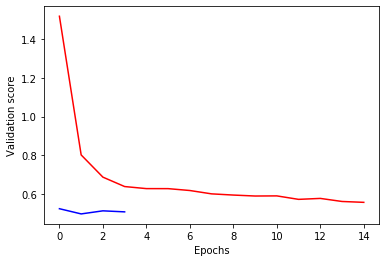

In [10]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

$\blacktriangleright$ **Code re-pre-loading:**

In [11]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

$\blacktriangleright$ **Network layers adding practice:**

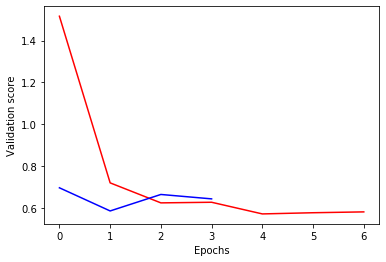

In [12]:
# The input shape to use in the first hidden layer
input_shape = (n_cols, )

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()